# Plot IgG vs Naive

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/1165936548.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/1165936548.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/1165936548.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bl

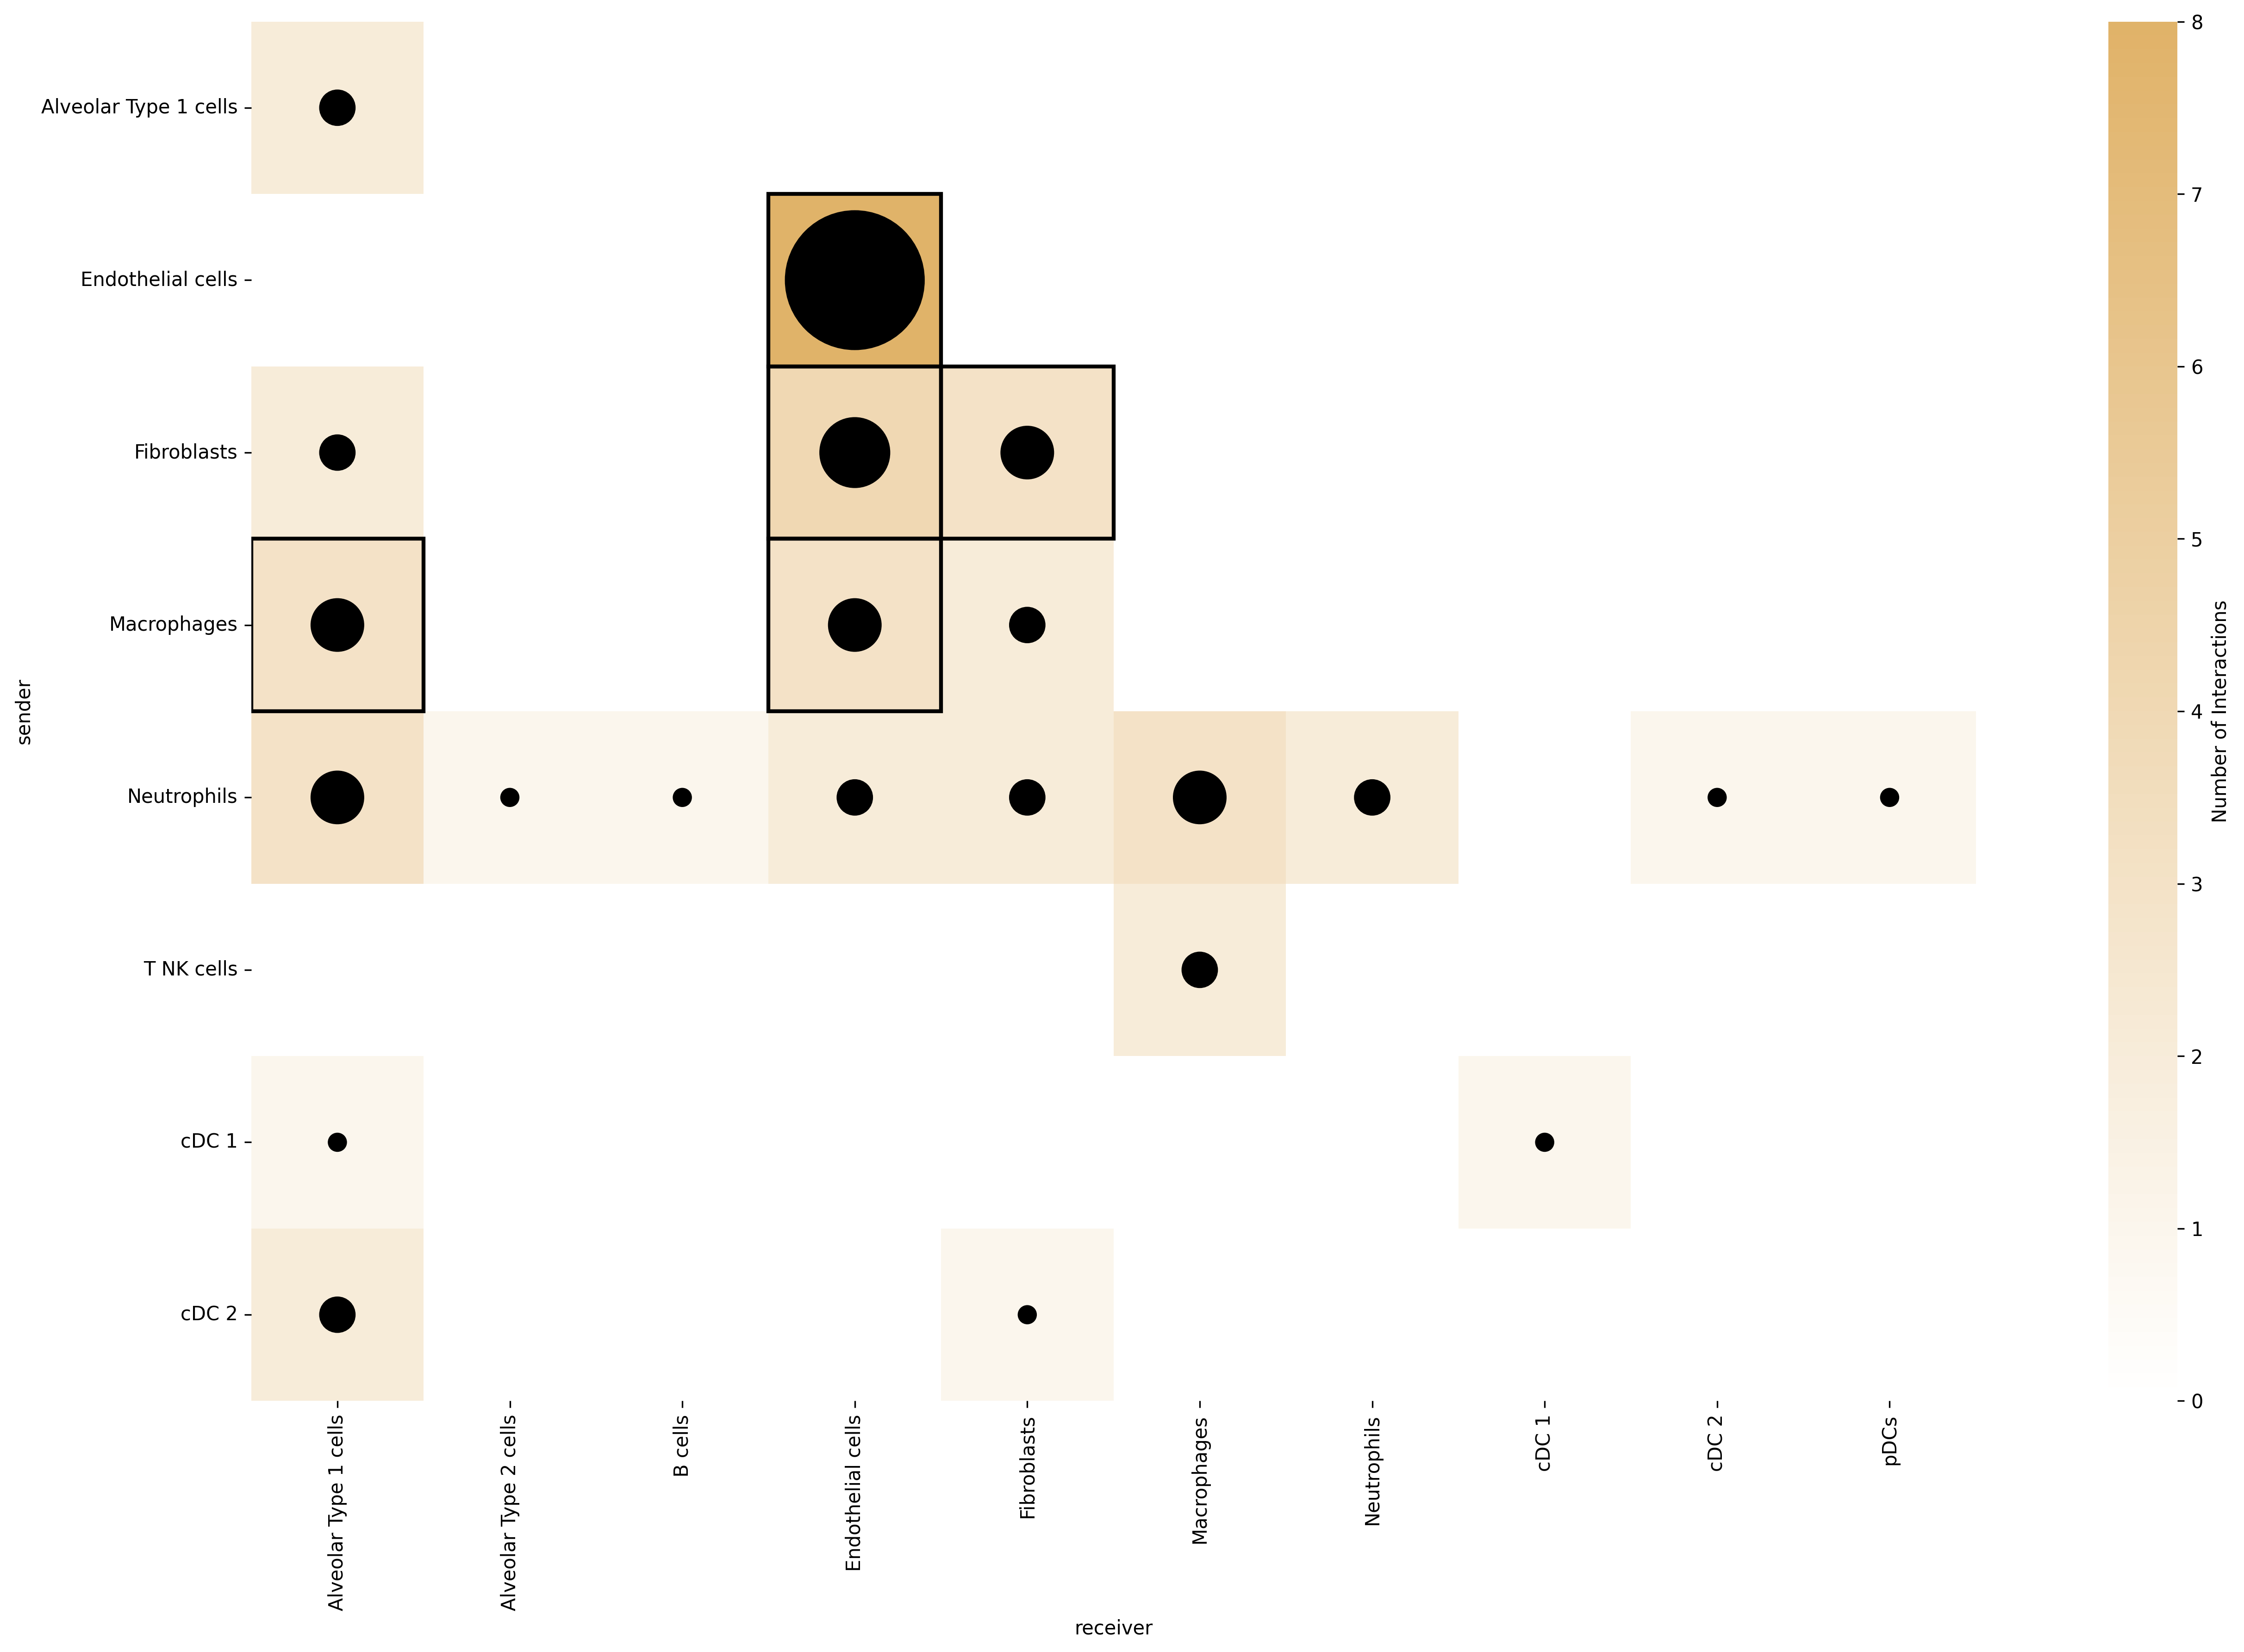

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/1165936548.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black')


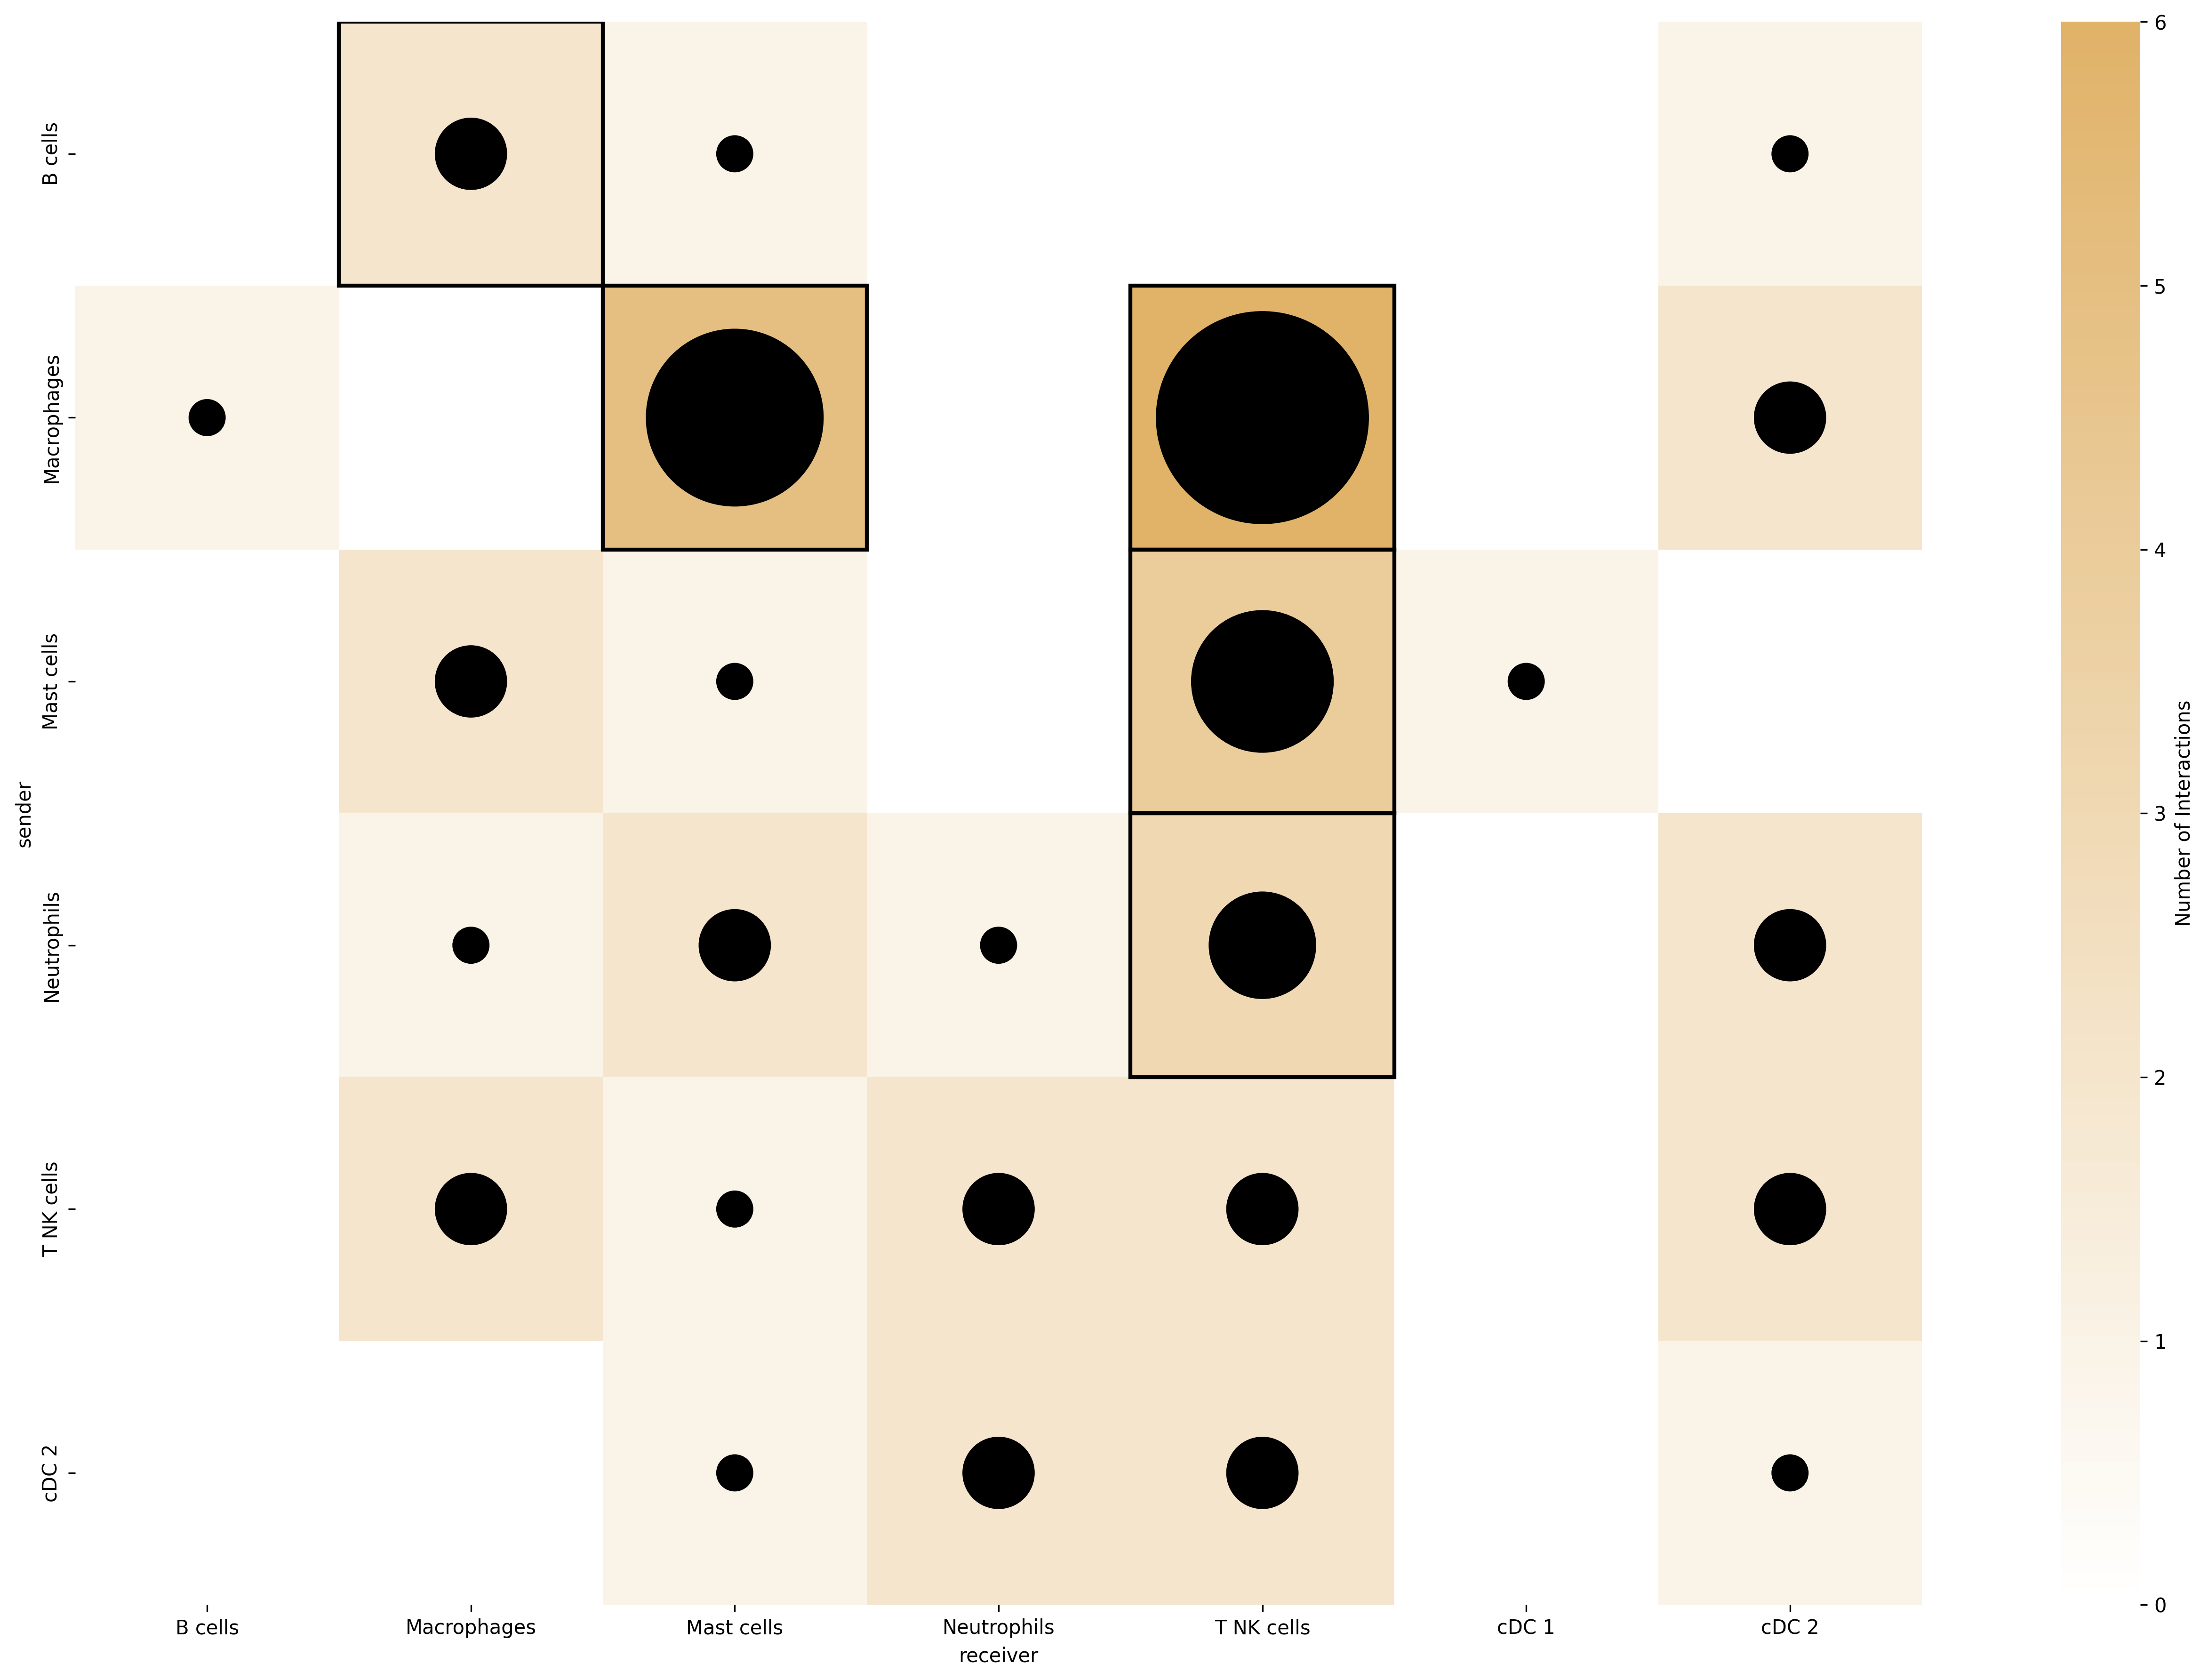


Naïve group top interactions:
Top interaction between Endothelial cells and Endothelial cells:
- Ligand-Receptor Pair: COL4A1-ITGA10
- Ligand-Receptor Pair: VCAM1-MSN
- Ligand-Receptor Pair: COL18A1-KDR
- Ligand-Receptor Pair: COL4A1-ITGB1
- Ligand-Receptor Pair: VCAM1-ITGB1
- Ligand-Receptor Pair: COL4A1-ITGA1
- Ligand-Receptor Pair: COL18A1-ITGA10
- Ligand-Receptor Pair: COL4A1-ITGAV
Top interaction between Fibroblasts and Endothelial cells:
- Ligand-Receptor Pair: COL4A1-ITGA10
- Ligand-Receptor Pair: COL5A1-ITGA10
- Ligand-Receptor Pair: IL6-IL6ST
- Ligand-Receptor Pair: COL4A1-ITGB1
Top interaction between Fibroblasts and Fibroblasts:
- Ligand-Receptor Pair: TNC-ITGAV
- Ligand-Receptor Pair: TNC-ITGA5
- Ligand-Receptor Pair: TNC-ITGB1
Top interaction between Macrophages and Alveolar Type 1 cells:
- Ligand-Receptor Pair: AREG-ERBB2
- Ligand-Receptor Pair: ADAM9-ITGB1
- Ligand-Receptor Pair: OSM-IL6ST
Top interaction between Macrophages and Endothelial cells:
- Ligand-Receptor Pair

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# import the CSV from R/multinichenet annotation
prioritization_data = pd.read_csv('./naive_IgG_prioritization_tables_top50.csv')

# replace '.' with ' ' in 'sender' and 'receiver' columns
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# prepare the interaction matrices for each group
interaction_matrix_naive = prioritization_data[prioritization_data['group'] == 'Naïve'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

colors = [(1, 1, 1), (0.88, 0.70, 0.41)]
cm = mcolors.LinearSegmentedColormap.from_list('custom_yellow', colors, N=100)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 12), dpi=300)
    sns.heatmap(matrix, cmap=cm, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})
    ax.set_aspect('equal')
    max_interaction = matrix.to_numpy().max()
    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / max_interaction) * 0.4
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black')
                ax.add_patch(circle)
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)
    plt.tight_layout()
    plt.show()
    return top_interactions

top_naive_interactions = plot_heatmap_with_circles_and_rectangles(interaction_matrix_naive, 'Interactions Between Cell Types - Naïve', 'Naïve', cm)
top_igg_interactions = plot_heatmap_with_circles_and_rectangles(interaction_matrix_igg, 'Interactions Between Cell Types - IgG', 'IgG', cm)

def extract_ligand_receptor_pairs(group, top_interactions):
    for sender, receiver in top_interactions:
        sub_data = prioritization_data[(prioritization_data['sender'] == sender) & (prioritization_data['receiver'] == receiver) & (prioritization_data['group'] == group)]
        print(f"Top interaction between {sender} and {receiver}:")
        for idx, row in sub_data.iterrows():
            print(f"- Ligand-Receptor Pair: {row['ligand']}-{row['receptor']}")

print("\nNaïve group top interactions:")
extract_ligand_receptor_pairs('Naïve', top_naive_interactions)

print("\nIgG group top interactions:")
extract_ligand_receptor_pairs('IgG', top_igg_interactions)

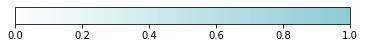

In [20]:
colors = [(1, 1, 1), "#8DCBD2"]  
cmap_name = 'custom_yellow_cmap'
cm_naive = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
plt.imshow([[0,1]], cmap=cm_naive)
plt.gca().set_visible(False)
plt.colorbar(orientation='horizontal')
plt.show()

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2819816803.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2819816803.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2819816803.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bl

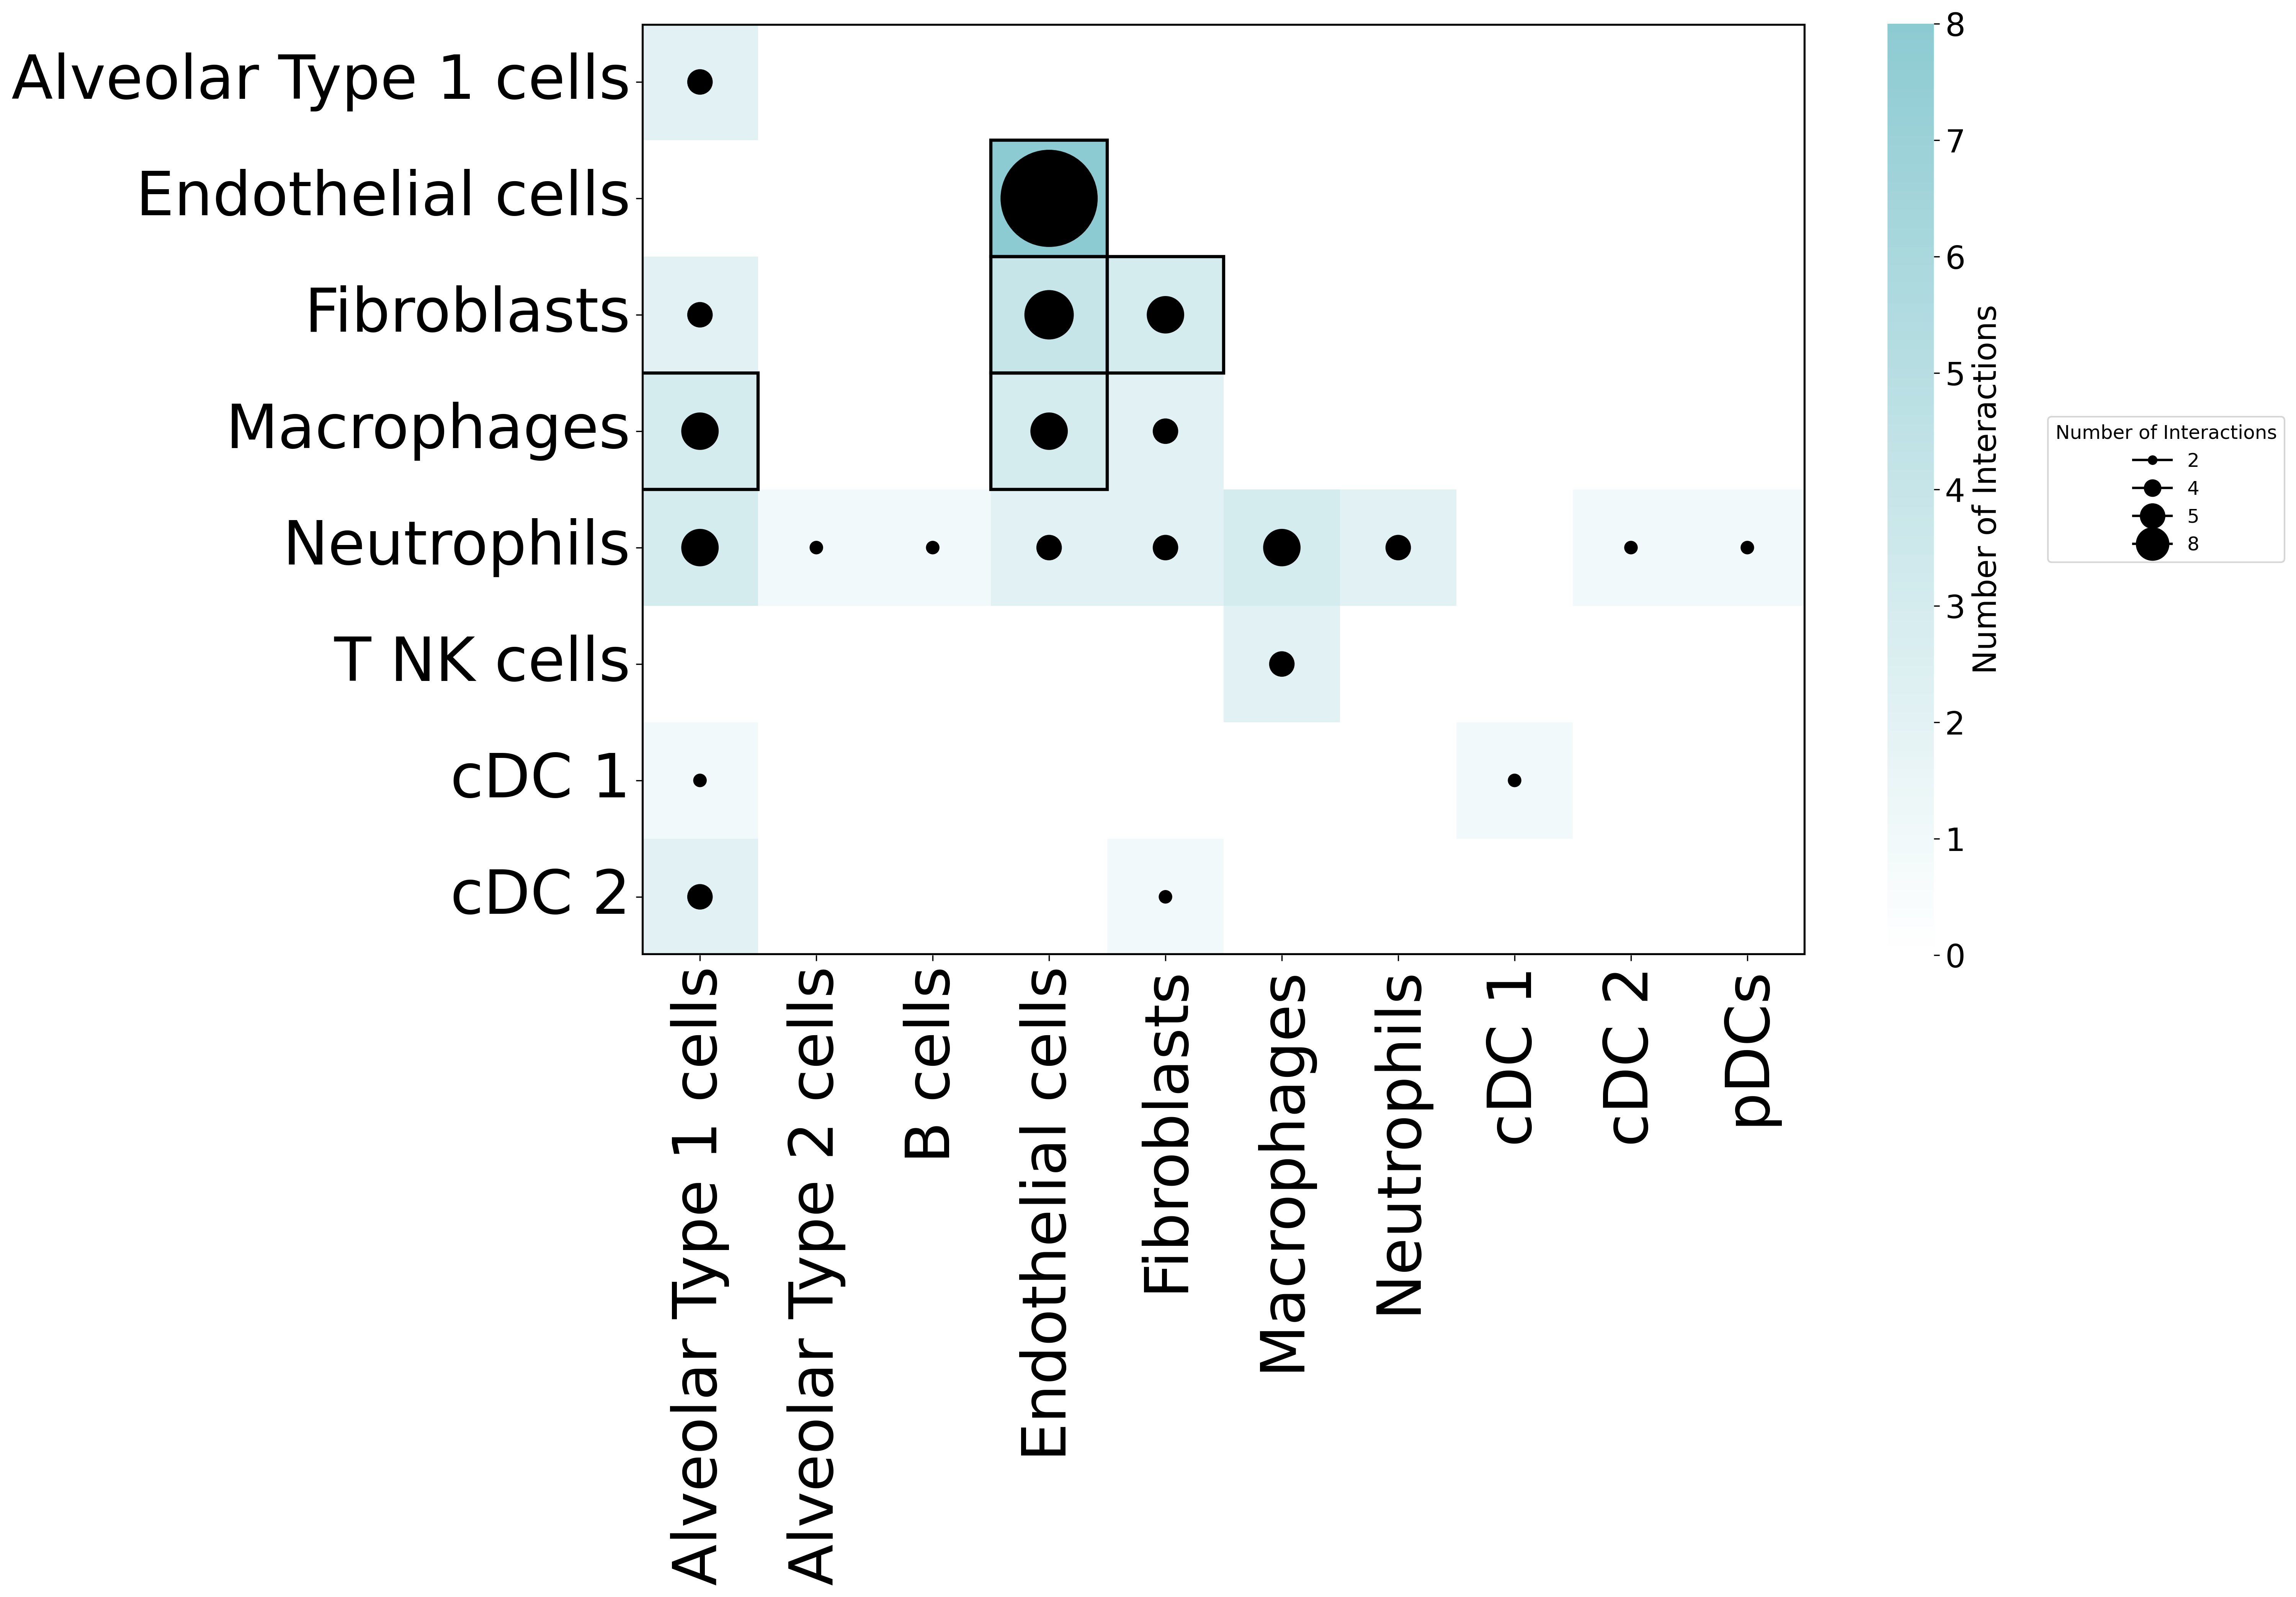

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the CSV from R/multinichenet annotation
prioritization_data = pd.read_csv('/Users/joshuadavidbromley/Desktop/nichenetfinal_oct23/naive_IgG_prioritization_tables_top50.csv')

# if you had to rename cell types in R
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# create separate interaction matrices for each group
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_naive = prioritization_data[prioritization_data['group'] == 'Naïve'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
    sns.heatmap(matrix, cmap=cm_naive, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})

    x0, y0, width, height = ax.get_position().bounds
    aspect_ratio = width / height * matrix.shape[1] / matrix.shape[0]

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
               
                size = (value / matrix.values.max()) * aspect_ratio * 0.4  
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black', clip_on=False)
                ax.add_artist(circle)

    ax.set_aspect('equal')
    # highlight top 5 interaction pairs
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)

    rect = plt.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=38,rotation=90) 
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=38,rotation=0)  
    plt.title('')
    circle_sizes = [0.1, 0.2, 0.3, 0.4]
    max_value = matrix.to_numpy().max()
    legend_labels = [int(size * max_value / 0.4) for size in circle_sizes]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=f'{label}', markersize=size*50) for size, label in zip(circle_sizes, legend_labels)]  # Increase markersize for larger dots
    legend = ax.legend(handles=legend_handles, title='Number of Interactions', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize='large', title_fontsize='large')
    legend.get_frame().set_facecolor('none')  
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=20)
    plt.tight_layout(rect=[0, 0, 0.9, 1.4])
plot_heatmap_with_circles_and_rectangles(interaction_matrix_naive, 'Interactions Between Cell Types - Naïve', 'Naïve', cm_naive)
plot_path_melted = "/Users/joshuadavidbromley/Desktop/Reinfection_Figures_For_Publication/Figure7/MainFigure/Fig7_NaivevIgG_cellcell.png"
plt.savefig(plot_path_melted, bbox_inches='tight', transparent=True,dpi=1000)

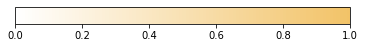

In [22]:
colors = [(1, 1, 1), "#F2C368"]  
cmap_name = 'custom_yellow_cmap'
cm_igg = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
plt.imshow([[0,1]], cmap=cm_igg)
plt.gca().set_visible(False)
plt.colorbar(orientation='horizontal')
plt.show()

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2171449719.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2171449719.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2171449719.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bla

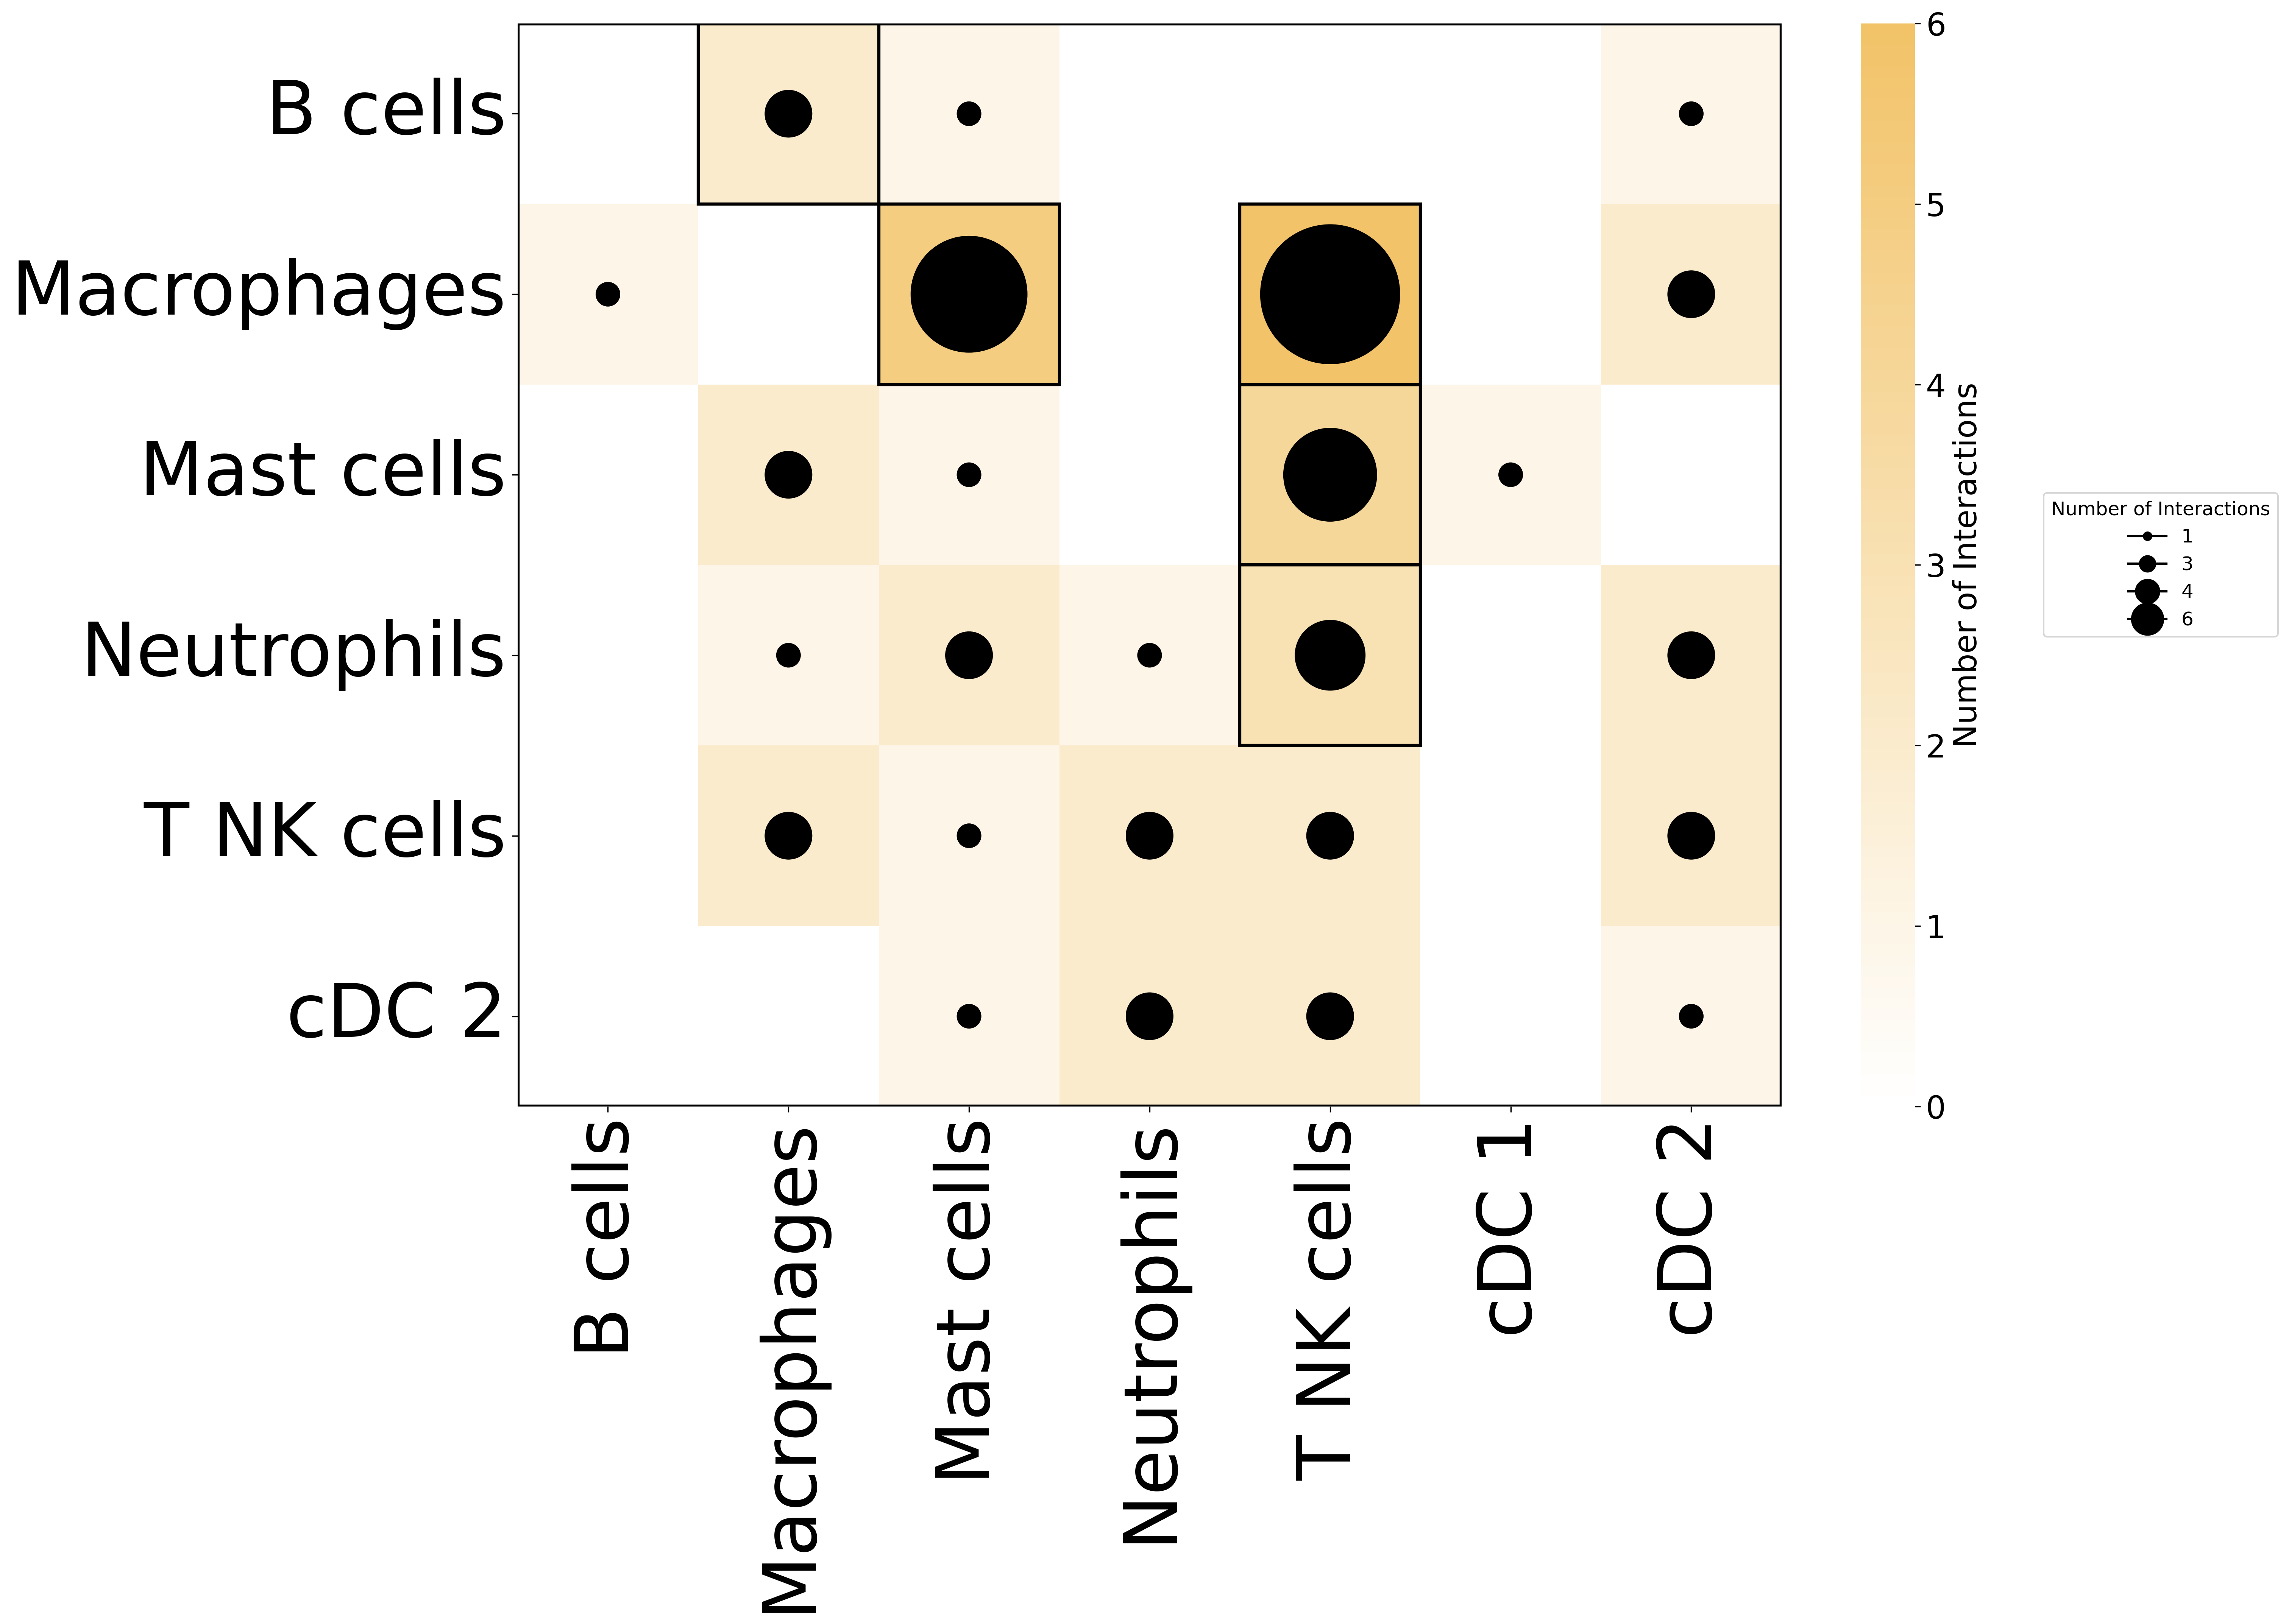

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the CSV from R/multinichenet annotation
prioritization_data = pd.read_csv('./naive_IgG_prioritization_tables_top50.csv')

# if you had to rename cell types in R
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# create separate interaction matrices for each group
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_naive = prioritization_data[prioritization_data['group'] == 'Naïve'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 12), dpi=300)
    sns.heatmap(matrix, cmap=cm_igg, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})

    x0, y0, width, height = ax.get_position().bounds
    aspect_ratio = width / height * matrix.shape[1] / matrix.shape[0]

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / matrix.values.max()) * aspect_ratio * 0.4  
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black', clip_on=False)
                ax.add_artist(circle)

    ax.set_aspect('equal')

    # highlight top 5 interaction pairs
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        # Add a black rectangle around the cell with the top interaction
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)

    rect = plt.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=47,rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=47,rotation=0)  
    plt.title('')
    circle_sizes = [0.1, 0.2, 0.3, 0.4]
    max_value = matrix.to_numpy().max()
    legend_labels = [int(size * max_value / 0.4) for size in circle_sizes]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=f'{label}', markersize=size*50) for size, label in zip(circle_sizes, legend_labels)]  
    legend = ax.legend(handles=legend_handles, title='Number of Interactions', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize='large', title_fontsize='large')
    legend.get_frame().set_facecolor('none') 
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=20)
    plt.tight_layout(rect=[0, 0, 0.9, 1.2])
plot_heatmap_with_circles_and_rectangles(interaction_matrix_igg, 'Interactions Between Cell Types - IgG', 'IgG', cm_igg)
plot_path_melted = "./Figure7/MainFigure/Fig7_IgGvNaive_cellcell.png"
plt.savefig(plot_path_melted, bbox_inches='tight', transparent=True,dpi=1000)

# Plot IgG vs antiCD4

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2212622882.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2212622882.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2212622882.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bl

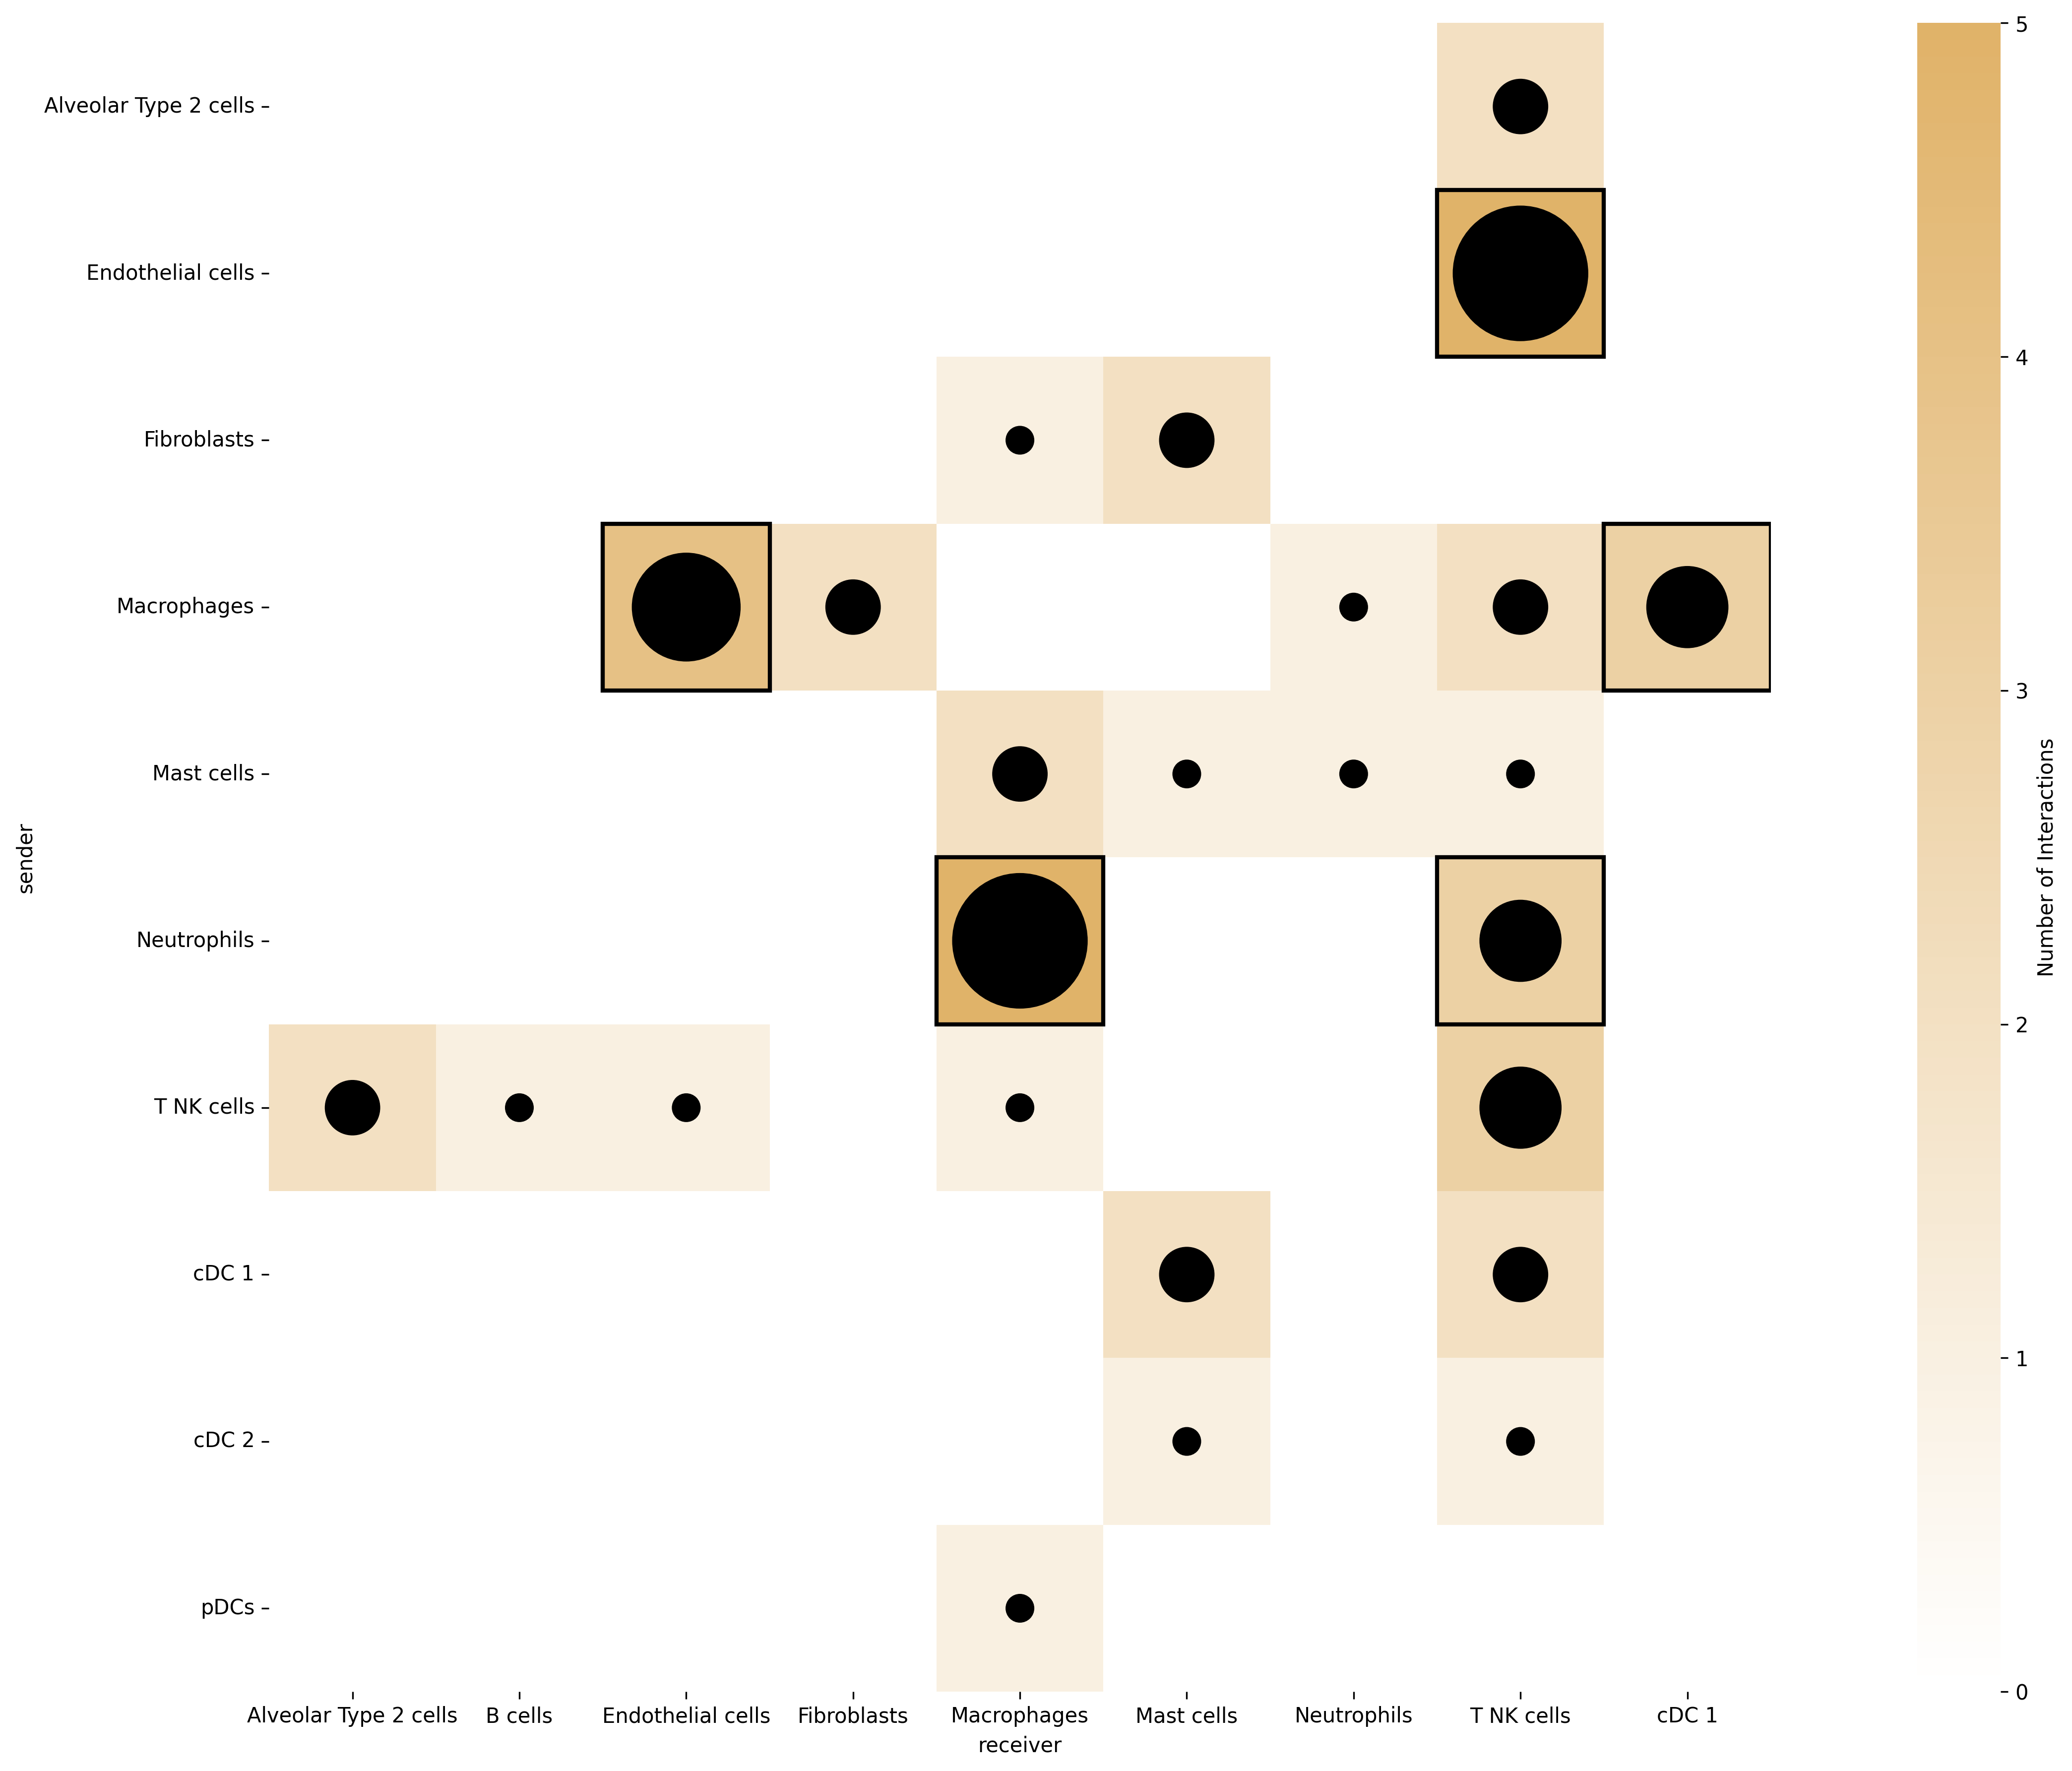

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2212622882.py:32: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black')


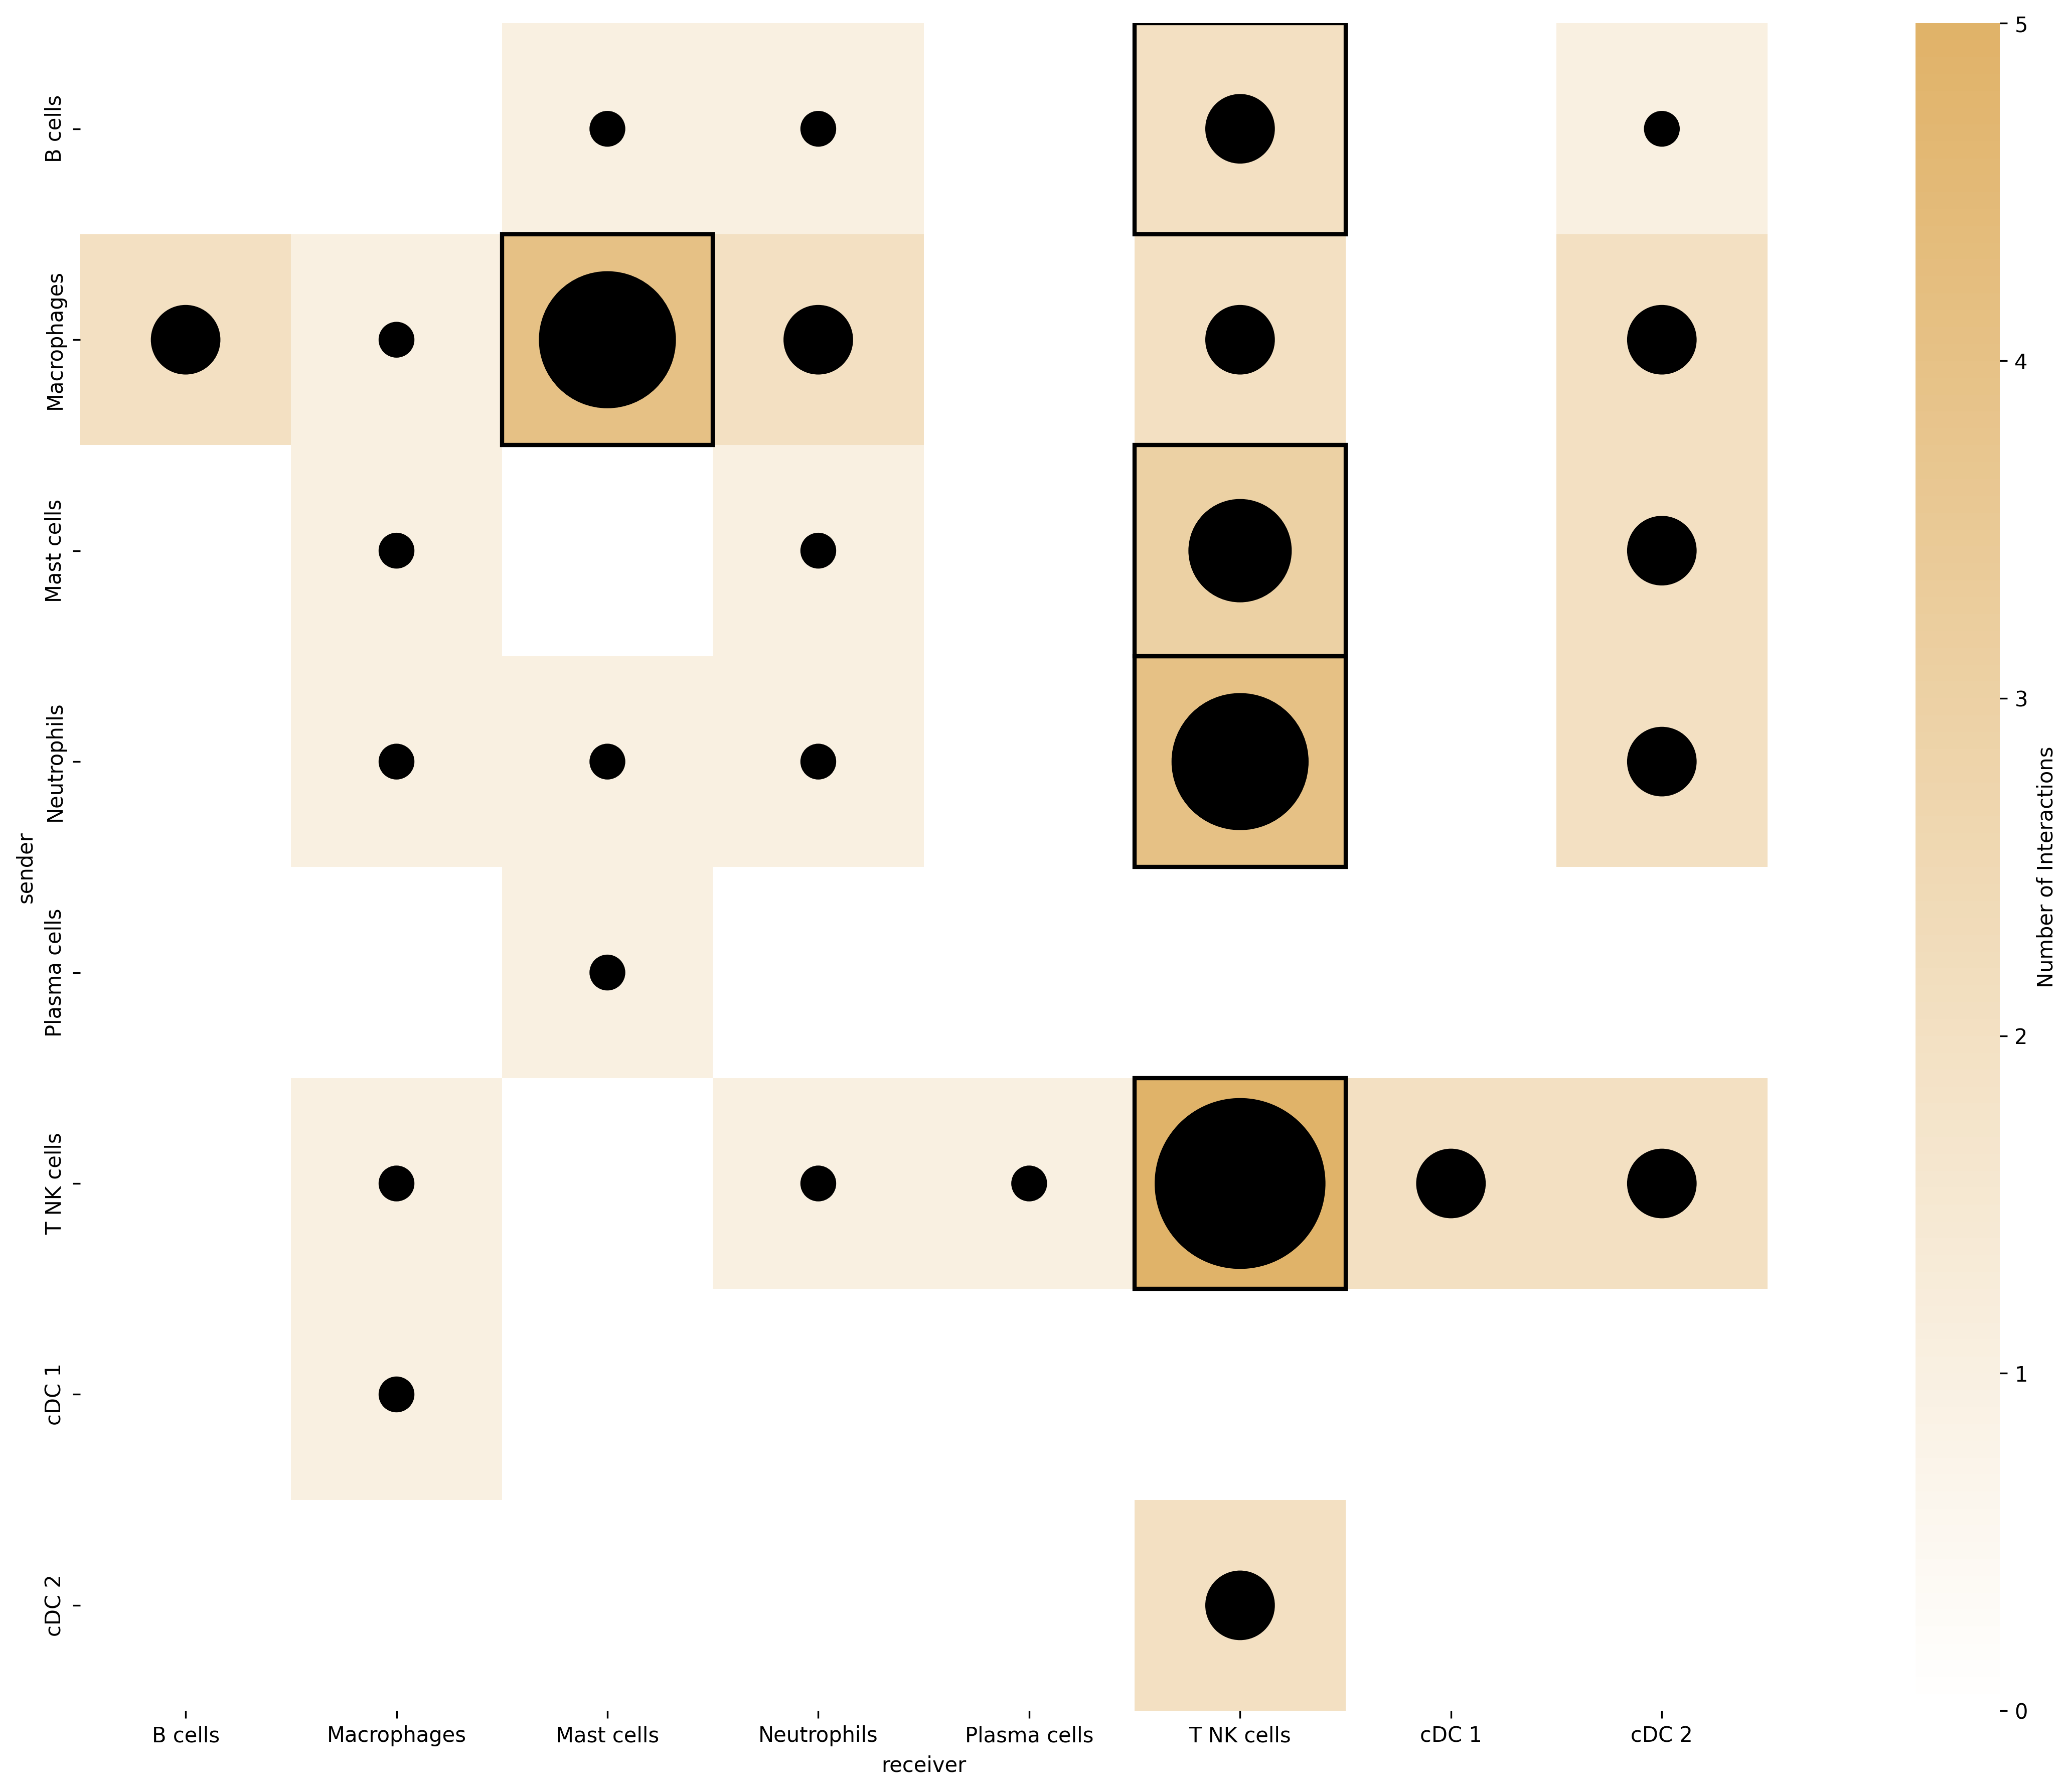

antiCD4 group top interactions:
Top interaction between Endothelial cells and T NK cells:
- Ligand-Receptor Pair: SEMA7A-ITGA1
- Ligand-Receptor Pair: COL4A1-ITGA1
- Ligand-Receptor Pair: LAMA4-ITGA6
- Ligand-Receptor Pair: SEMA7A-PLXNC1
- Ligand-Receptor Pair: COL4A2-ITGA1
Top interaction between Neutrophils and Macrophages:
- Ligand-Receptor Pair: TNF-LTBR
- Ligand-Receptor Pair: TNF-TNFRSF1B
- Ligand-Receptor Pair: TNF-TNFRSF21
- Ligand-Receptor Pair: IL1B-IL1RAP
- Ligand-Receptor Pair: IL1B-IL1R1
Top interaction between Macrophages and Endothelial cells:
- Ligand-Receptor Pair: CXCL11-ACKR1
- Ligand-Receptor Pair: CXCL9-ACKR1
- Ligand-Receptor Pair: CXCL10-ACKR1
- Ligand-Receptor Pair: VEGFA-FLT1
Top interaction between Macrophages and cDC 1:
- Ligand-Receptor Pair: CXCL10-CXCR3
- Ligand-Receptor Pair: CD274-CD80
- Ligand-Receptor Pair: SIRPB2-CD47
Top interaction between Neutrophils and T NK cells:
- Ligand-Receptor Pair: ICAM1-IL2RA
- Ligand-Receptor Pair: SEMA7A-ITGA1
- Ligand-R

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# load the data
prioritization_data = pd.read_csv('./aCD4_IgG_prioritization_tables_top50.csv')

# replace '.' with ' ' in 'sender' and 'receiver' columns
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# prepare the interaction matrices for each group
interaction_matrix_acd4 = prioritization_data[prioritization_data['group'] == 'antiCD4'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

colors = [(1, 1, 1), (0.88, 0.70, 0.41)]
cm = mcolors.LinearSegmentedColormap.from_list('custom_yellow', colors, N=100)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 12), dpi=300)
    sns.heatmap(matrix, cmap=cm, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})
    ax.set_aspect('equal')
    max_interaction = matrix.to_numpy().max()
    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / max_interaction) * 0.4
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black')
                ax.add_patch(circle)
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)
    plt.tight_layout()
    plt.show()
    return top_interactions

top_acd4_interactions = plot_heatmap_with_circles_and_rectangles(interaction_matrix_acd4, 'Interactions Between Cell Types - antiCD4', 'antiCD4', cm)
top_igg_interactions = plot_heatmap_with_circles_and_rectangles(interaction_matrix_igg, 'Interactions Between Cell Types - IgG', 'IgG', cm)

def extract_ligand_receptor_pairs(group, top_interactions):
    for sender, receiver in top_interactions:
        sub_data = prioritization_data[(prioritization_data['sender'] == sender) & (prioritization_data['receiver'] == receiver) & (prioritization_data['group'] == group)]
        print(f"Top interaction between {sender} and {receiver}:")
        for idx, row in sub_data.iterrows():
            print(f"- Ligand-Receptor Pair: {row['ligand']}-{row['receptor']}")

print("antiCD4 group top interactions:")
extract_ligand_receptor_pairs('antiCD4', top_acd4_interactions)

print("\nIgG group top interactions:")
extract_ligand_receptor_pairs('IgG', top_igg_interactions)

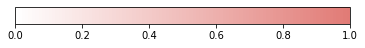

In [3]:
colors = [(1, 1, 1), "#E17B76"] 
cmap_name = 'custom_yellow_cmap'
cm_acd4 = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
plt.imshow([[0,1]], cmap=cm_acd4)
plt.gca().set_visible(False)
plt.colorbar(orientation='horizontal')
plt.show()

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2884859603.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2884859603.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/2884859603.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bl

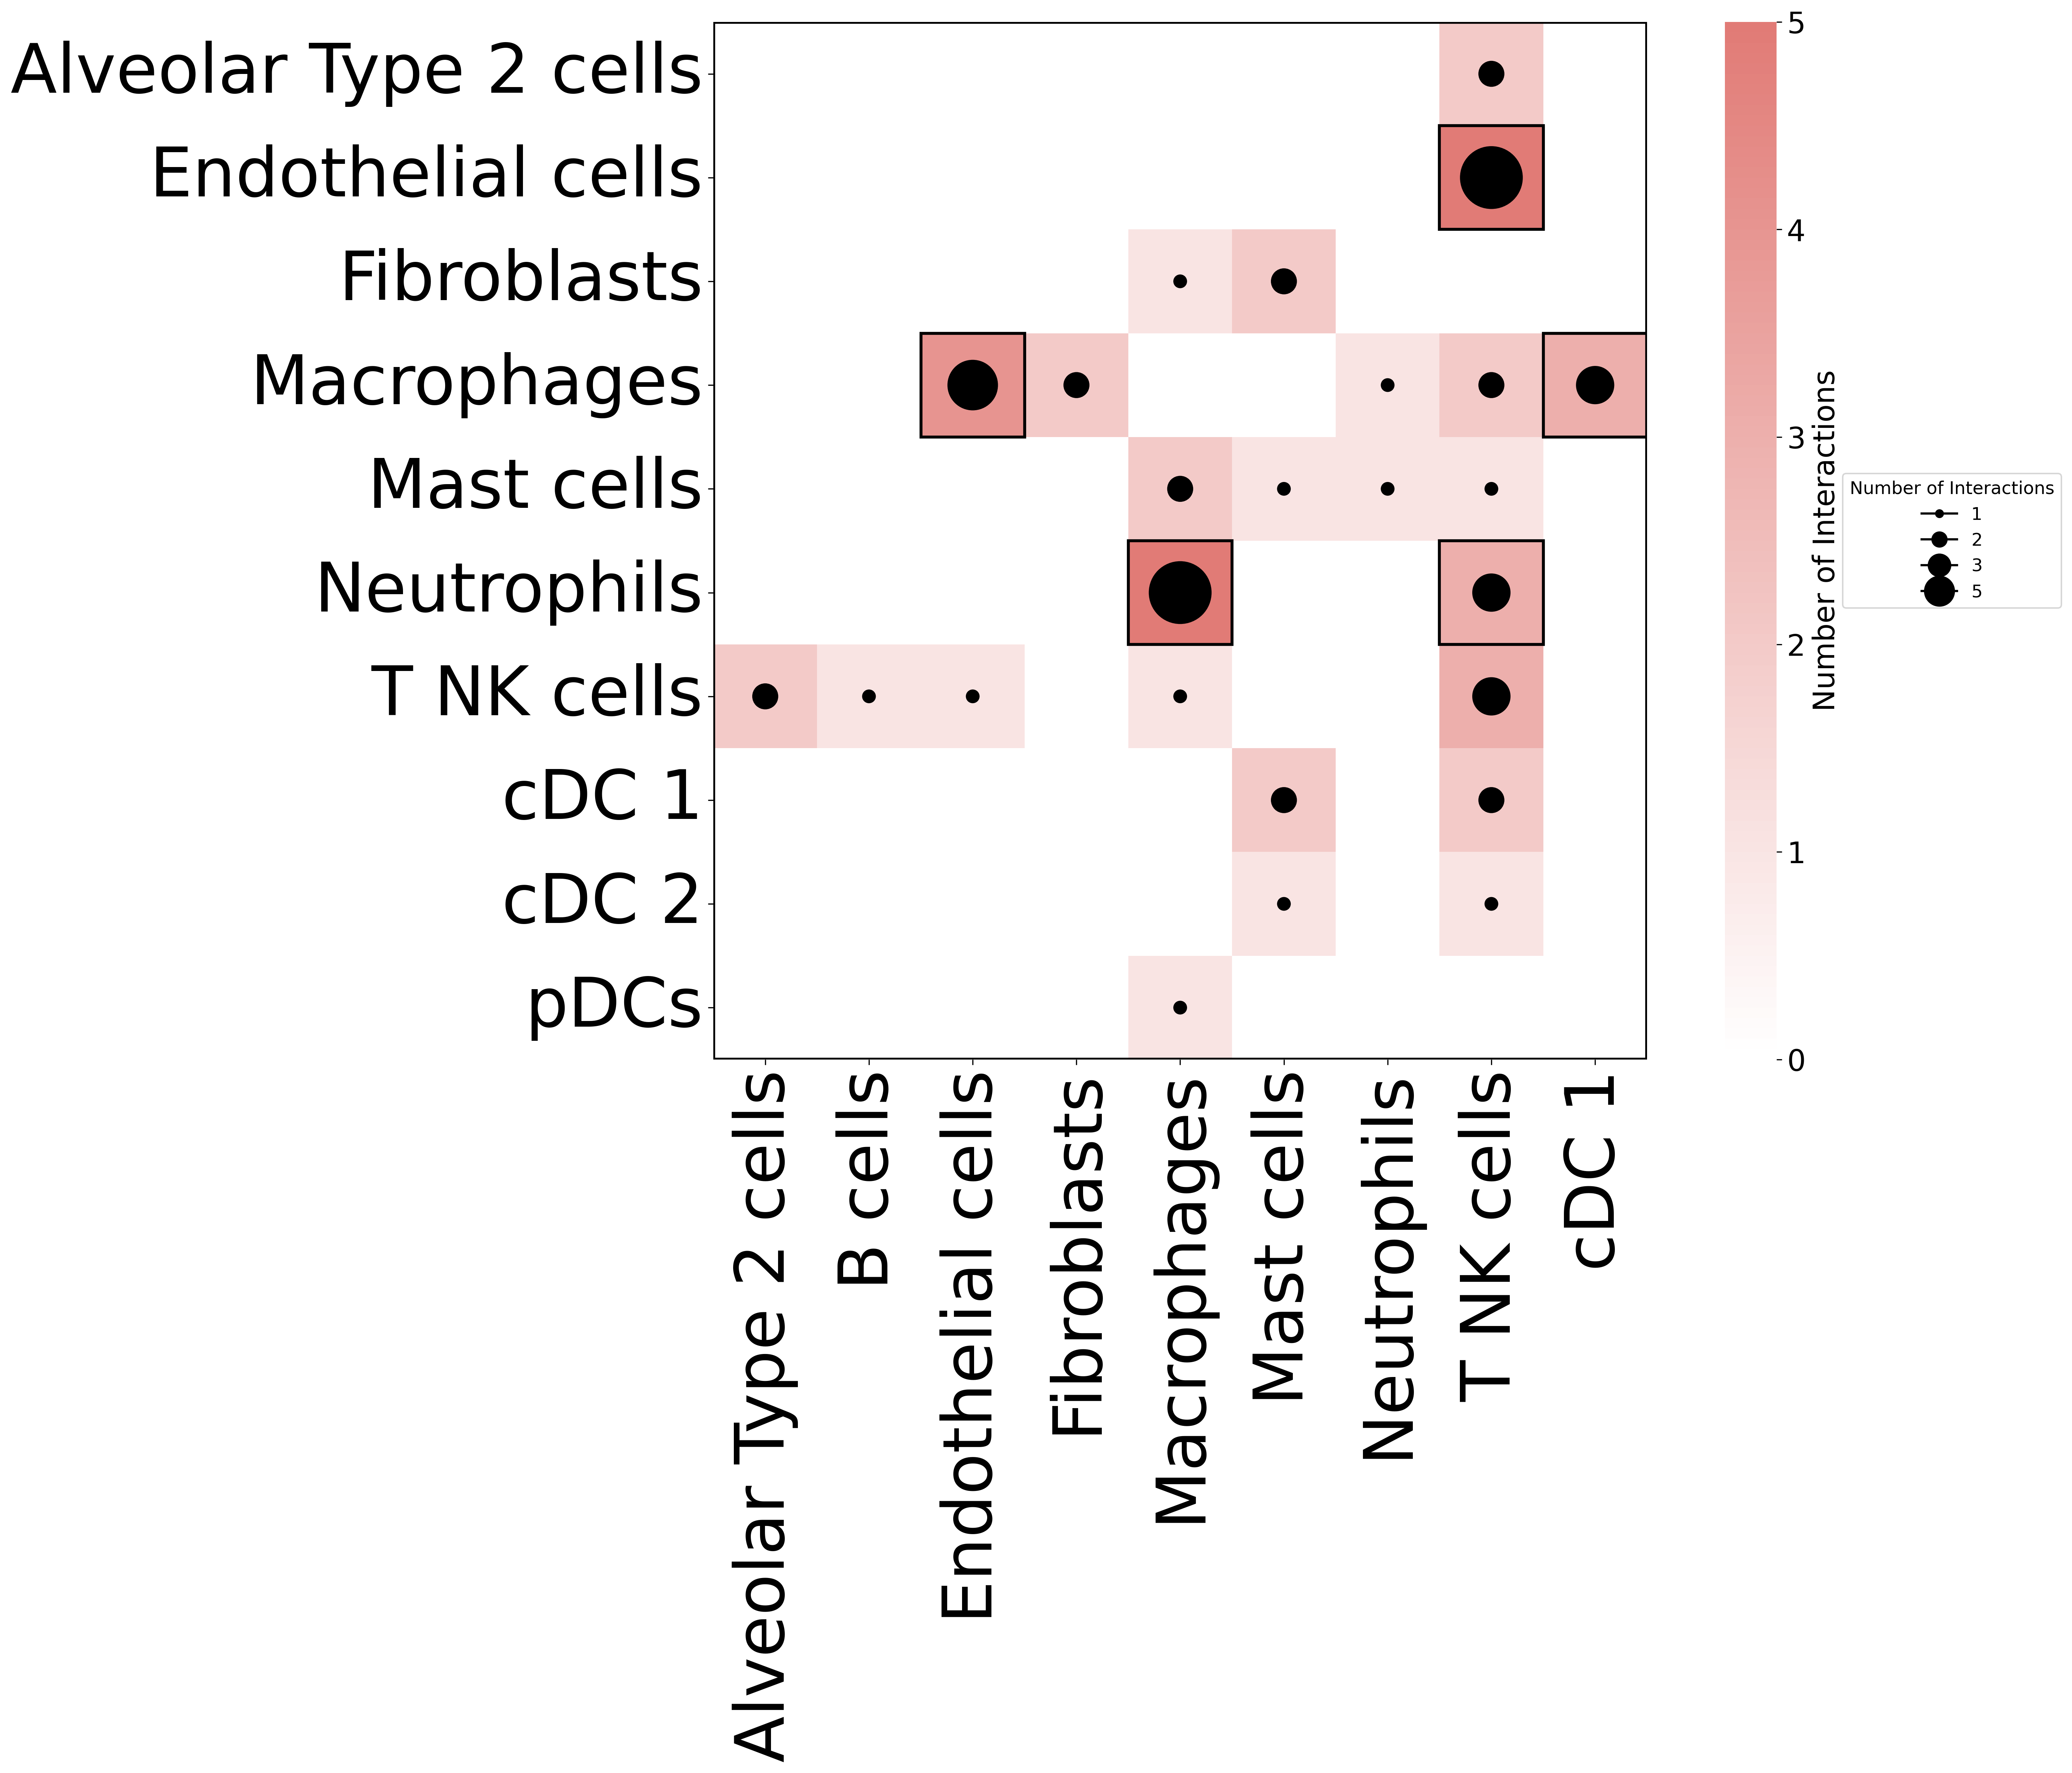

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the CSV from R/multinichenet annotation
prioritization_data = pd.read_csv('./aCD4_IgG_prioritization_tables_top50.csv')

# if you had to rename cell types in R
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# create separate interaction matrices for each group
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_anticd4 = prioritization_data[prioritization_data['group'] == 'antiCD4'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 12), dpi=300)
    # Plot the base heatmap with the custom colormap
    sns.heatmap(matrix, cmap=cm_acd4, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})

    x0, y0, width, height = ax.get_position().bounds
    aspect_ratio = width / height * matrix.shape[1] / matrix.shape[0]

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / matrix.values.max()) * aspect_ratio * 0.4 
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black', clip_on=False)
                ax.add_artist(circle)

    ax.set_aspect('equal')

    # highlight top 5 interaction pairs
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)

    rect = plt.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=46,rotation=90) 
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=46,rotation=0)  
    plt.title('')
    circle_sizes = [0.1, 0.2, 0.3, 0.4]
    max_value = matrix.to_numpy().max()
    legend_labels = [int(size * max_value / 0.4) for size in circle_sizes]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=f'{label}', markersize=size*50) for size, label in zip(circle_sizes, legend_labels)]  # Increase markersize for larger dots
    legend = ax.legend(handles=legend_handles, title='Number of Interactions', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize='large', title_fontsize='large')
    legend.get_frame().set_facecolor('none') 
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=20)
    plt.tight_layout(rect=[0, 0, 0.9, 1.4])
plot_heatmap_with_circles_and_rectangles(interaction_matrix_anticd4, 'Interactions Between Cell Types - antiCD4', 'antiCD4', cm_acd4)
plot_path_melted = "./Figure7/MainFigure/Fig7_aCD4vIgG_cellcell.png"
plt.savefig(plot_path_melted, bbox_inches='tight', transparent=True,dpi=1000)

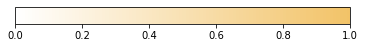

In [8]:
colors = [(1, 1, 1), "#F2C368"] 
cmap_name = 'custom_yellow_cmap'
cm_igg = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
plt.imshow([[0,1]], cmap=cm_igg)
plt.gca().set_visible(False)
plt.colorbar(orientation='horizontal')
plt.show()

/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/4289647032.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/4289647032.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')
/var/folders/9z/kgyvt2qj1ws7gpsg6llgw1dw0000gn/T/ipykernel_50146/4289647032.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='bla

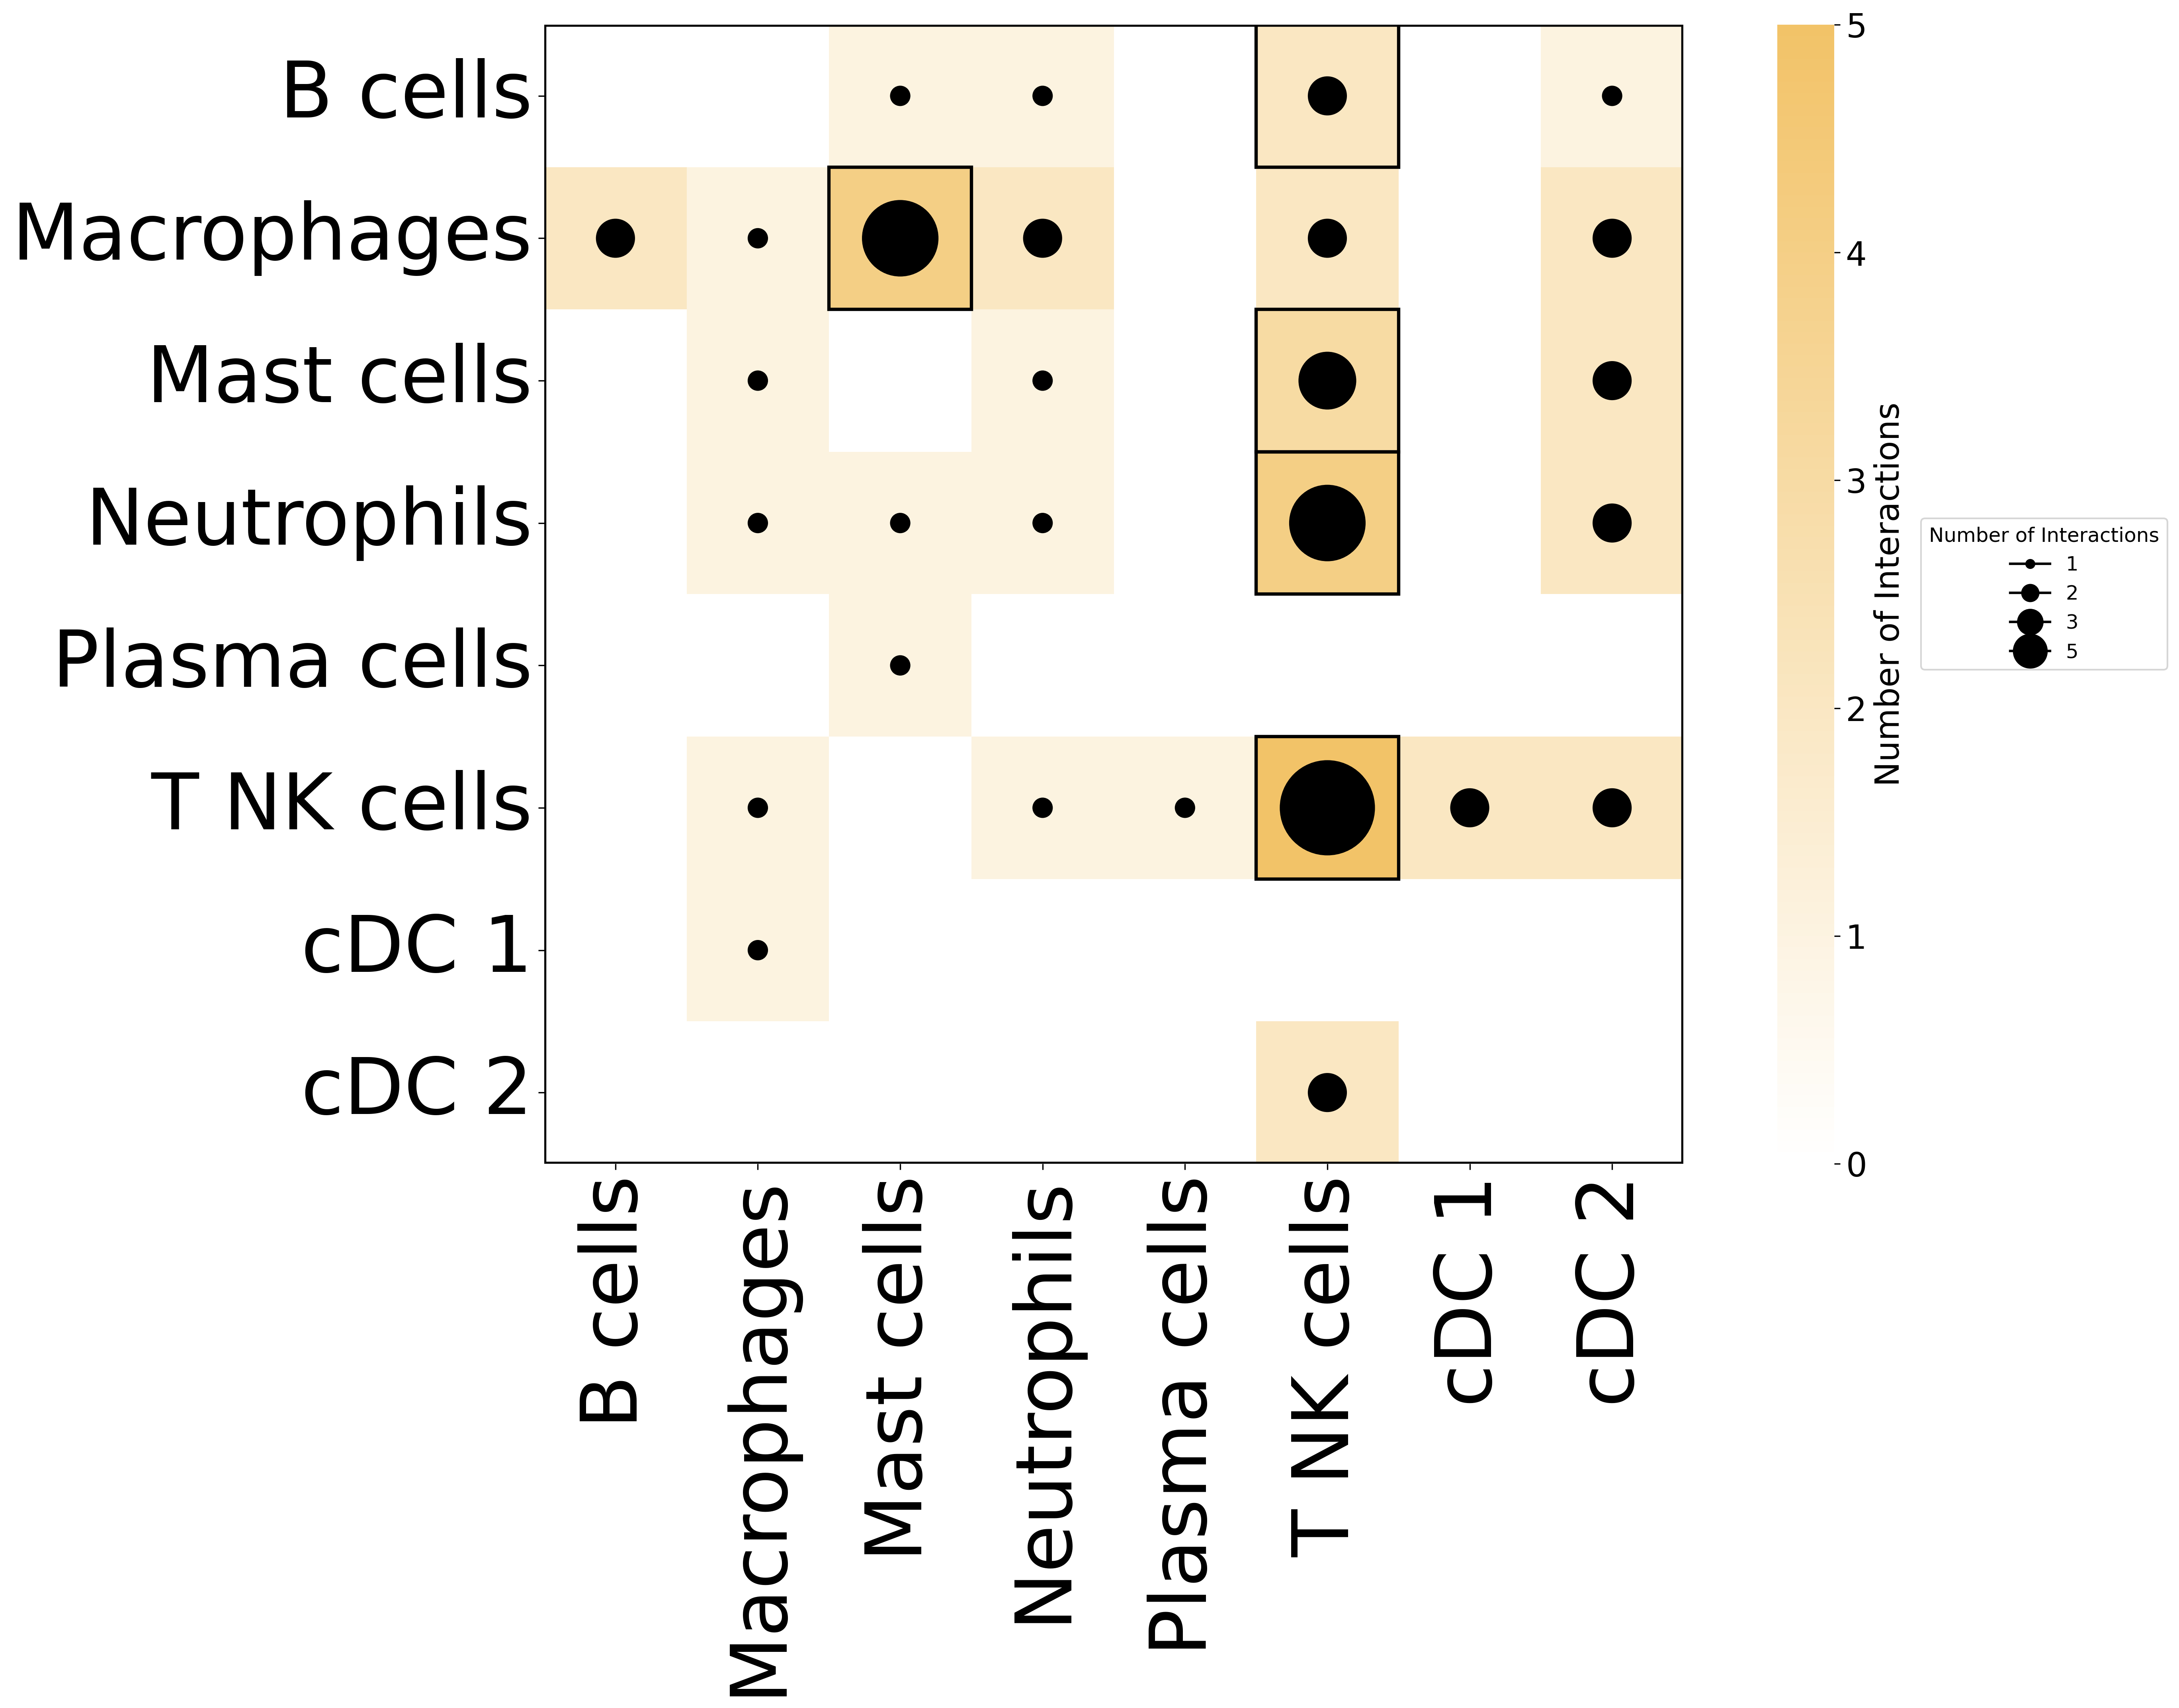

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the CSV from R/multinichenet annotation
prioritization_data = pd.read_csv('./aCD4_IgG_prioritization_tables_top50.csv')

# if you had to rename cell types in R
prioritization_data['sender'] = prioritization_data['sender'].str.replace('.', ' ')
prioritization_data['receiver'] = prioritization_data['receiver'].str.replace('.', ' ')

# create separate interaction matrices for each group
interaction_matrix_igg = prioritization_data[prioritization_data['group'] == 'IgG'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)
interaction_matrix_anticd4 = prioritization_data[prioritization_data['group'] == 'antiCD4'].groupby(['sender', 'receiver']).size().unstack(fill_value=0)

def plot_heatmap_with_circles_and_rectangles(matrix, title, group, cm):
    fig, ax = plt.subplots(figsize=(20, 12), dpi=300)
    # Plot the base heatmap with the custom colormap
    sns.heatmap(matrix, cmap=cm_igg, annot=False, fmt='d', ax=ax, cbar=True, xticklabels=True, yticklabels=True, cbar_kws={'label': 'Number of Interactions'})

    x0, y0, width, height = ax.get_position().bounds
    aspect_ratio = width / height * matrix.shape[1] / matrix.shape[0]

    for y in range(matrix.shape[0]):
        for x in range(matrix.shape[1]):
            value = matrix.iloc[y, x]
            if value > 0:
                size = (value / matrix.values.max()) * aspect_ratio * 0.4  
                circle = plt.Circle((x + 0.5, y + 0.5), size, color='black', edgecolor='black', clip_on=False)
                ax.add_artist(circle)

    ax.set_aspect('equal')

    # highlight top 5 interaction pairs
    top_interactions = matrix.stack().nlargest(5).index
    for sender, receiver in top_interactions:
        sender_idx = matrix.index.get_loc(sender)
        receiver_idx = matrix.columns.get_loc(receiver)
        rect = plt.Rectangle((receiver_idx, sender_idx), 1, 1, fill=False, edgecolor='black', lw=2)
        ax.add_patch(rect)
    rect = plt.Rectangle((0, 0), matrix.shape[1], matrix.shape[0], linewidth=2.5, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=47,rotation=90)  # Adjust the size as needed
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=47,rotation=0)  
    plt.title('')
    circle_sizes = [0.1, 0.2, 0.3, 0.4]
    max_value = matrix.to_numpy().max()
    legend_labels = [int(size * max_value / 0.4) for size in circle_sizes]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='black', label=f'{label}', markersize=size*50) for size, label in zip(circle_sizes, legend_labels)]  # Increase markersize for larger dots
    legend = ax.legend(handles=legend_handles, title='Number of Interactions', loc='center left', bbox_to_anchor=(1.2, 0.5), fontsize='large', title_fontsize='large')
    legend.get_frame().set_facecolor('none')  
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(cbar.ax.get_ylabel(), fontsize=20)
    plt.tight_layout(rect=[0, 0, 0.9, 1.2])
plot_heatmap_with_circles_and_rectangles(interaction_matrix_igg, 'Interactions Between Cell Types - IgG', 'IgG', cm_igg)
plot_path_melted = "./Figure7/MainFigure/Fig7_IgGvaCD4_cellcell.png"
plt.savefig(plot_path_melted, bbox_inches='tight', transparent=True,dpi=1000)